## Introduction to GPS Tracking of Birds

In [1]:
import pandas as pd

In [2]:
birddata=pd.read_csv("bird_tracking.csv")

In [3]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [4]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


## Simple Data Visualizations

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [87]:
ix=birddata.bird_name=="Eric"

In [8]:
x,y=birddata.longitude[ix],birddata.latitude[ix]

In [9]:
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

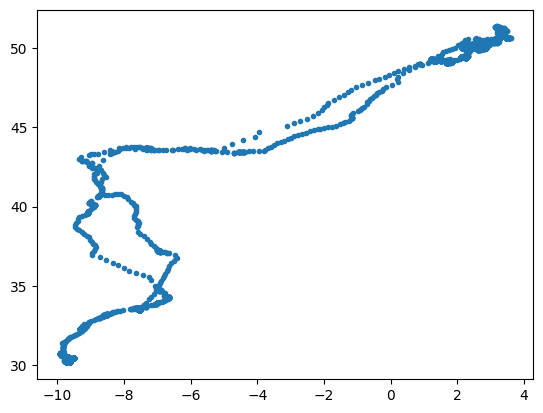

In [10]:
plt.plot(x,y,".")

In [90]:
bird_names=pd.unique(birddata.bird_name)

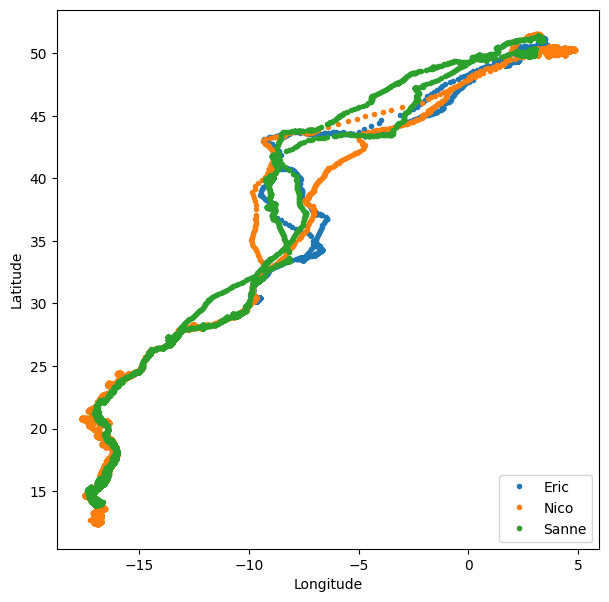

In [13]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix=birddata.bird_name==bird_name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

## Examining Flight Speed

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

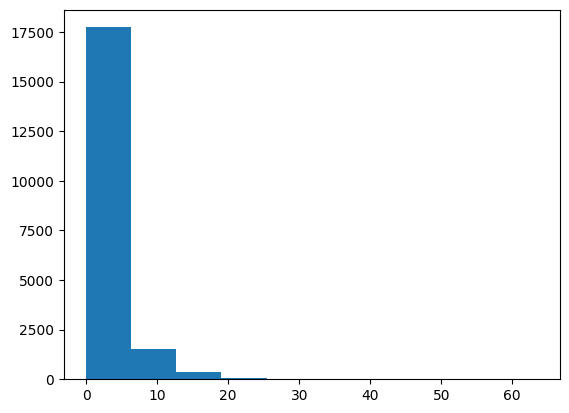

In [14]:
ix=birddata.bird_name=="Eric"
speed=birddata.speed_2d[ix]
plt.hist(speed)

In [15]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <BarContainer object of 10 artists>)

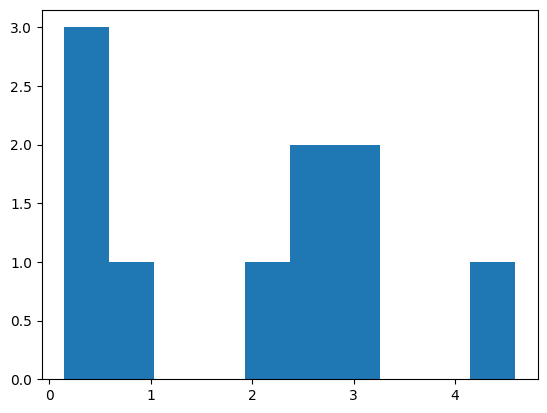

In [16]:
plt.hist(speed[:10])

In [19]:
np.where(np.isnan(speed)==True)

(array([  219,  1005,  1231,  1254,  1530,  1730,  2469,  3218,  3405,
         3412,  3429,  3435,  3596,  3616,  3637,  3736,  3741,  4047,
         4066,  4118,  4147,  4355,  4512,  4592,  4687,  4777,  4927,
         4982,  5008,  5025,  5115,  5156,  5734,  5743,  5902,  6001,
         6570,  6663,  6932,  6972,  7429,  7596,  8179,  8932,  9201,
         9324,  9356,  9425,  9592, 10106, 10142, 10152, 10162, 10552,
        10941, 10943, 11320, 12617, 12761, 13095, 13181, 13283, 14109,
        14475, 14997, 15031, 15104, 15579, 15774, 15811, 15909, 16783,
        16975, 17945, 18233, 18314, 19193, 19516, 19525, 19545, 19620,
        19621, 19753, 19771, 19778]),)

In [20]:
np.isnan(speed).any()

True

In [21]:
np.sum(np.isnan(speed))

85

In [22]:
ind=np.isnan(speed)

In [23]:
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [24]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

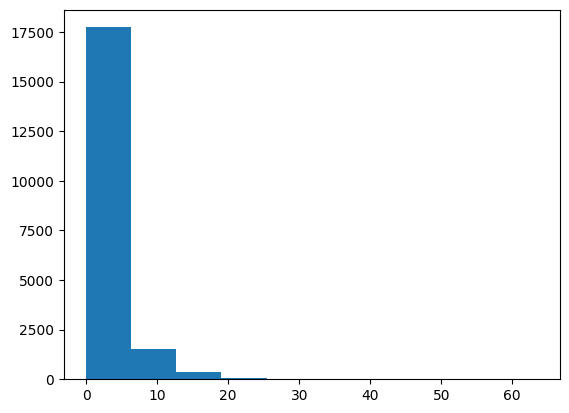

In [26]:
ix=birddata.bird_name=="Eric"
speed=birddata.speed_2d[ix]
ind=np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

Text(0, 0.5, 'Frequency')

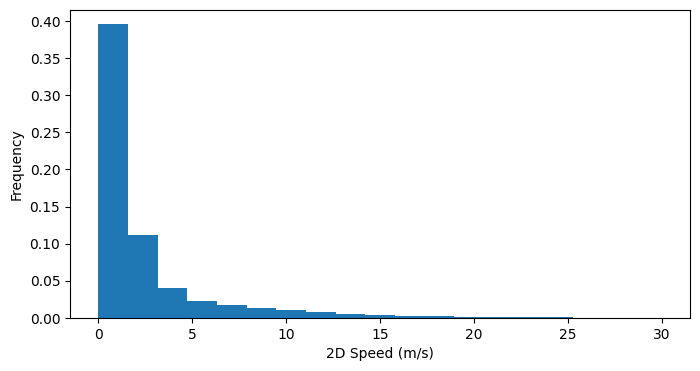

In [31]:
plt.figure(figsize=(8,4))
speed=birddata.speed_2d[birddata.bird_name=="Eric"]
ind=np.isnan(speed)
plt.hist(speed[~ind],bins=np.linspace(0,30,20),density=True)
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")

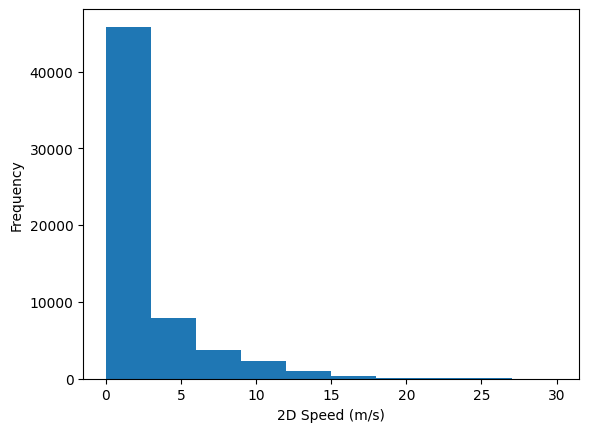

In [29]:
birddata.speed_2d.plot(kind="hist",range=[0,30])
plt.xlabel("2D Speed (m/s)")
plt.savefig("pd_hist.pdf")

##  Using Datetime

In [33]:
birddata.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [34]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [36]:
import datetime

In [37]:
datetime.datetime.today()

datetime.datetime(2023, 8, 15, 19, 26, 7, 562734)

In [38]:
time_1=datetime.datetime.today()

In [41]:
time_2=datetime.datetime.today()

In [42]:
time_2-time_1

datetime.timedelta(seconds=33, microseconds=462056)

In [43]:
date_str=birddata.date_time[0]

In [44]:
type(date_str)

str

In [46]:
date_str[:-3]

'2013-08-15 00:18:08'

In [47]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [54]:
timestamps=[]
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
    (birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))

In [55]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [56]:
birddata["timestamp"]=pd.Series(timestamps,index=birddata.index)

In [57]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [58]:
birddata.timestamp[4]-birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [62]:
times=birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time=[time-times[0] for time in times]

In [64]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [65]:
elapsed_time[1000]/datetime.timedelta(days=1)

12.084722222222222

In [66]:
elapsed_time[1000]/datetime.timedelta(hours=1)

290.03333333333336

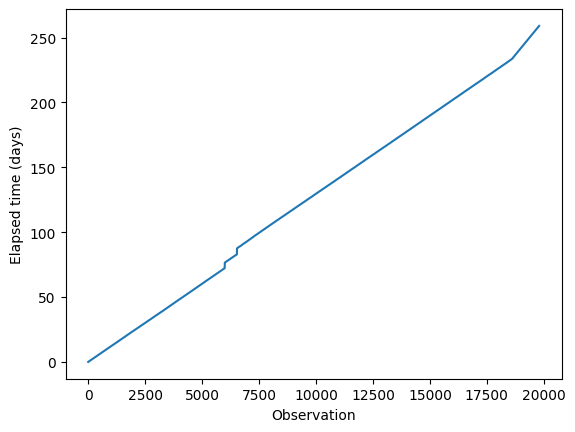

In [68]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

## Calculating Daily Mean Speed

In [72]:
data=birddata[birddata.bird_name=="Eric"]
times=data.timestamp
elapsed_time=[time-times[0] for time in times]
elapsed_days=np.array(elapsed_time)/datetime.timedelta(days=1)

In [73]:
next_day=1
inds=[]
daily_mean_speed=[]
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day+=1
        inds=[]

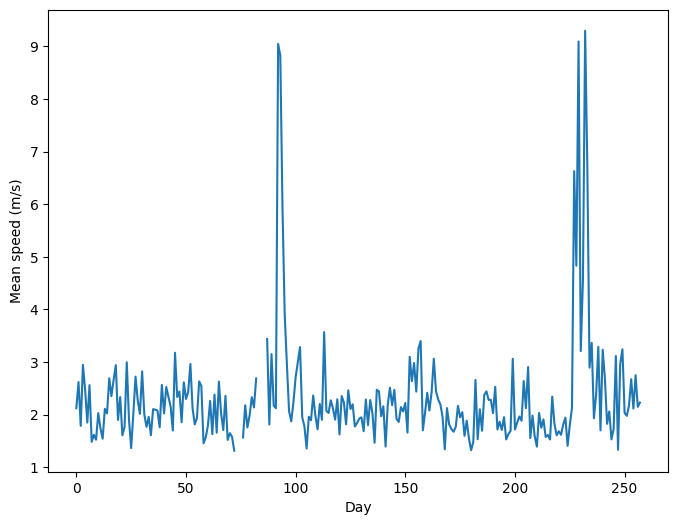

In [75]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.savefig("dms.pdf")

### Exercise

In [76]:
data_sanne=birddata[birddata.bird_name=="Sanne"]
times_sanne=data_sanne.timestamp

In [78]:
times_sanne

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: timestamp, Length: 21004, dtype: datetime64[ns]

## Using the Cartopy Library

In [79]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/Users/elsonlai/MyWork/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/elsonlai/MyWork/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


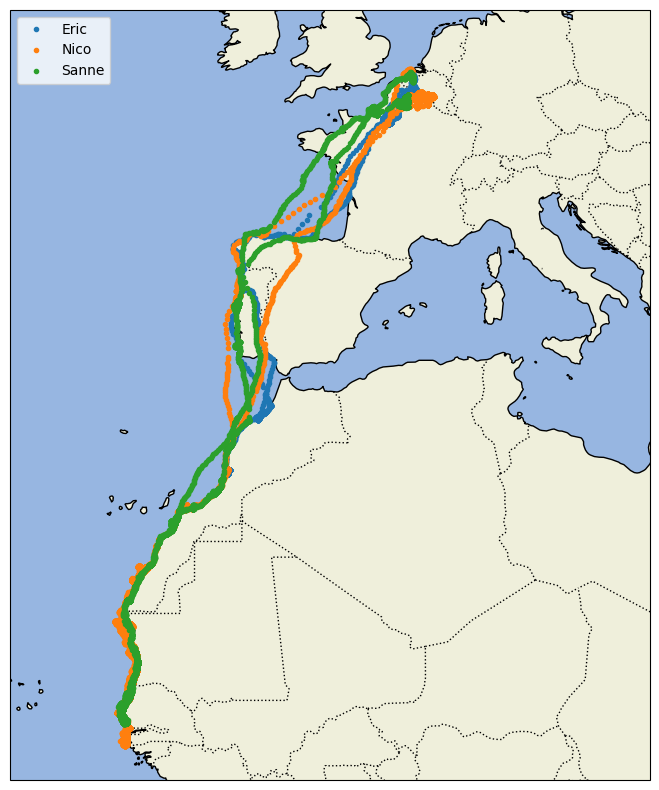

In [86]:
proj=ccrs.Mercator() ##specify specific projection

plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
for name in bird_names:
    ix=birddata['bird_name']==name
    x,y=birddata.longitude[ix],birddata.latitude[ix]
    ax.plot(x,y,'.',transform=ccrs.Geodetic(),label=name)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")